<a href="https://colab.research.google.com/github/Tanmoy-Mandal/2025_02_23/blob/colab/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary Files**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, f1_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# **Read dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3D printing/2025_02_17/2025_02_04_3D_printing_2025_02_17.csv')
# data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3D printing/2025_02_04/2025_02_04_3D_printing.csv')
data.head()

,Material,Geometry,Print_speed(),Layer_thickness(mm),Infill_density(%),Infill_density(%).1,Wall_thickness,Measured_wall_thickness,Height,Measured_height,...,Volume,Measured_volume,Wall_T_deviation,Wall_T_deviation(%),Outer_D_deviation,Out_D_deviation(%),Height_deviation,Height_deviation(%),Volume_deviation,Volume_deviation(%)
0,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),2,2.195000,10,10.576667,...,1130.976,1280.004071,0.195000,9.750000,0.255000,1.275000,0.576667,5.766667,149.028071,13.176944
1,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),3,3.200000,10,10.740000,...,1602.216,1791.770594,0.200000,6.666667,0.205000,1.025000,0.740000,7.400000,189.554594,11.830776
2,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),4,4.265000,10,10.766667,...,2010.624,2275.007772,0.265000,6.625000,0.035000,0.175000,0.766667,7.666667,264.383772,13.149339
3,ABS,ring,Normal,0.3,80,Solid_honeycomb(80),5,5.258333,10,10.783333,...,2356.200,2598.115568,0.258333,5.166667,0.156667,0.783333,0.783333,7.833333,241.915568,10.267192
4,ABS,ring,Normal,0.3,60,Semi_solid_honeycomb(60),2,2.095000,10,10.653333,...,1130.976,1240.010880,0.095000,4.750000,0.220000,1.100000,0.653333,6.533333,109.034880,9.640778


# **Column Name**

In [ ]:
print(f'Data Shape: ', data.shape)
data.columns

Data Shape:  (40, 26)


Index(['Material', 'Geometry', 'Print_speed()', 'Layer_thickness(mm)',
       'Infill_density(%)', 'Infill_density(%).1', 'Wall_thickness',
       'Measured_wall_thickness', 'Height', 'Measured_height', 'Diameter',
       'Measured_diameter', 'Outer_radius', 'Measured_outer_r', 'Inner_radius',
       'Measured_inner_radius', 'Volume', 'Measured_volume',
       'Wall_T_deviation', 'Wall_T_deviation(%)', 'Outer_D_deviation',
       'Out_D_deviation(%)', 'Height_deviation', 'Height_deviation(%)',
       'Volume_deviation', 'Volume_deviation(%)'],
      dtype='object')

# **Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material                 40 non-null     object 
 1   Geometry                 40 non-null     object 
 2   Print_speed()            40 non-null     object 
 3   Layer_thickness(mm)      40 non-null     float64
 4   Infill_density(%)        40 non-null     int64  
 5   Infill_density(%).1      40 non-null     object 
 6   Wall_thickness           40 non-null     int64  
 7   Measured_wall_thickness  40 non-null     float64
 8   Height                   40 non-null     int64  
 9   Measured_height          40 non-null     float64
 10  Diameter                 40 non-null     int64  
 11  Measured_diameter        40 non-null     float64
 12  Outer_radius             40 non-null     int64  
 13  Measured_outer_r         40 non-null     float64
 14  Inner_radius             40 

# **Data Description**

In [ ]:
data.describe()

,Layer_thickness(mm),Infill_density(%),Wall_thickness,Measured_wall_thickness,Height,Measured_height,Diameter,Measured_diameter,Outer_radius,Measured_outer_r,...,Volume,Measured_volume,Wall_T_deviation,Wall_T_deviation(%),Outer_D_deviation,Out_D_deviation(%),Height_deviation,Height_deviation(%),Volume_deviation,Volume_deviation(%)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.0,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.300000,56.000000,3.500000,3.582292,8.500000,9.143417,20.0,19.814000,10.0,9.907000,...,1508.753400,1638.958258,0.084208,2.779444,0.190917,0.954583,0.643417,9.220397,130.204858,10.356193
std,0.039223,21.815074,1.132277,1.125224,3.366502,3.375067,0.0,0.125459,0.0,0.062729,...,732.151902,749.909295,0.060178,2.104279,0.117640,0.588200,0.095460,5.037606,43.486458,4.714455
min,0.200000,20.000000,2.000000,2.055000,3.000000,3.596667,20.0,19.556667,10.0,9.778333,...,339.292800,406.621545,0.008333,0.166667,0.015000,0.075000,0.416667,3.111111,61.373954,2.100500
25%,0.300000,40.000000,2.750000,2.821250,5.000000,5.607500,20.0,19.726250,10.0,9.863125,...,1005.312000,1135.805685,0.039583,1.000000,0.091667,0.458333,0.593333,6.333333,102.486200,7.211735
50%,0.300000,60.000000,3.500000,3.607500,10.000000,10.588333,20.0,19.816667,10.0,9.908333,...,1504.826400,1606.330373,0.071667,2.395833,0.183333,0.916667,0.640000,7.500000,127.201627,9.538408
75%,0.300000,80.000000,4.250000,4.439167,10.000000,10.735000,20.0,19.908333,10.0,9.954167,...,2010.624000,2174.361724,0.097500,3.916667,0.273750,1.368750,0.735000,11.242857,154.400063,13.150712
max,0.350000,80.000000,5.000000,5.258333,15.000000,15.740000,20.0,20.043333,10.0,10.021667,...,3534.300000,3683.955012,0.265000,9.750000,0.443333,2.216667,0.783333,24.777778,264.383772,21.784978


# **Drop data Column**

In [ ]:
df = data.drop(columns=['Material', 'Geometry', 'Print_speed()',
       'Infill_density(%).1',
         'Diameter', 'Measured_diameter',
       'Outer_radius', 'Measured_outer_r', 'Inner_radius',
       'Measured_inner_radius', 'Measured_volume','Measured_wall_thickness',
       'Wall_T_deviation', 'Wall_T_deviation(%)', 'Outer_D_deviation',
       'Out_D_deviation(%)',
       'Volume_deviation', 'Volume_deviation(%)', 'Height_deviation(%)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Layer_thickness(mm)  40 non-null     float64
 1   Infill_density(%)    40 non-null     int64  
 2   Wall_thickness       40 non-null     int64  
 3   Height               40 non-null     int64  
 4   Measured_height      40 non-null     float64
 5   Volume               40 non-null     float64
 6   Height_deviation     40 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 2.3 KB


# **New Data description**

In [ ]:
df.describe()

,Layer_thickness(mm),Infill_density(%),Wall_thickness,Height,Measured_height,Volume,Height_deviation
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.300000,56.000000,3.500000,8.500000,9.143417,1508.753400,0.643417
std,0.039223,21.815074,1.132277,3.366502,3.375067,732.151902,0.095460
min,0.200000,20.000000,2.000000,3.000000,3.596667,339.292800,0.416667
25%,0.300000,40.000000,2.750000,5.000000,5.607500,1005.312000,0.593333
50%,0.300000,60.000000,3.500000,10.000000,10.588333,1504.826400,0.640000
75%,0.300000,80.000000,4.250000,10.000000,10.735000,2010.624000,0.735000
max,0.350000,80.000000,5.000000,15.000000,15.740000,3534.300000,0.783333


# **Correlation Heatmap of the 3D printing Dataset**

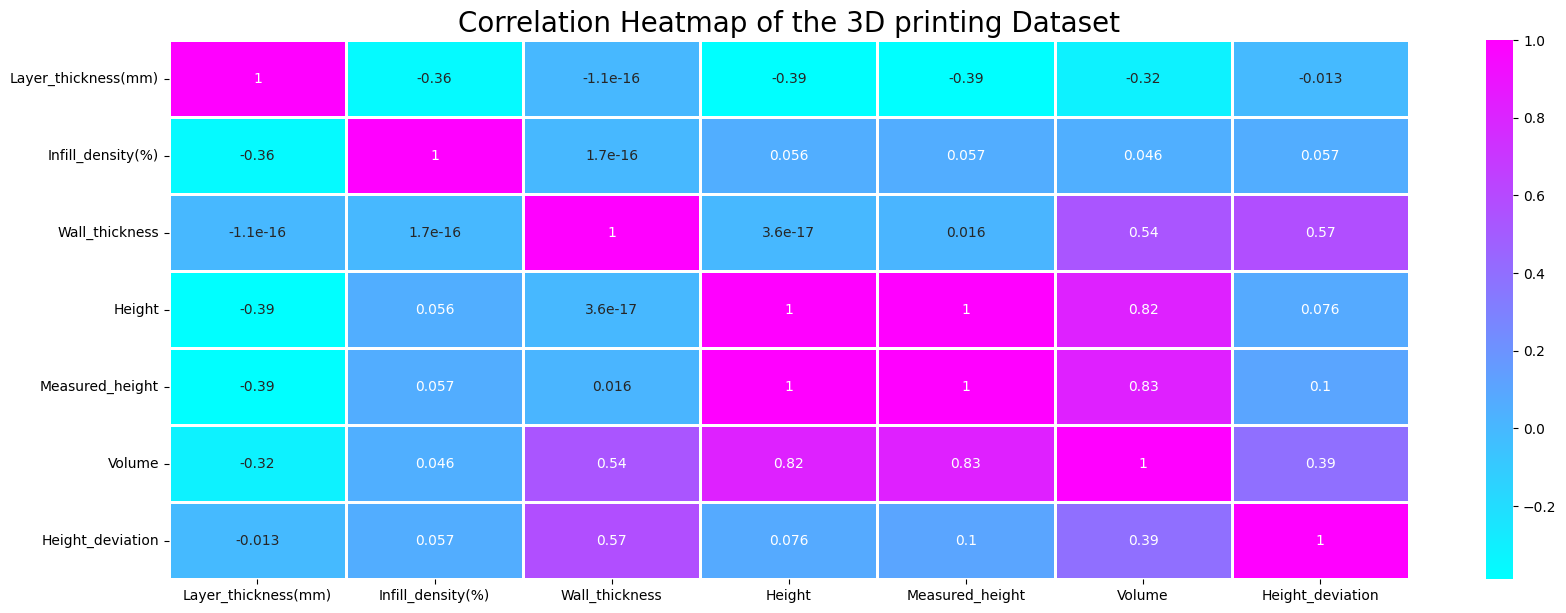

In [ ]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (20,7))

#Title for the heatmap
title = 'Correlation Heatmap of the 3D printing Dataset'
plt.title(title, fontsize = 20)
ttl = ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)

#enable visualization using .show() function of matplot
plt.show()

# **Split the dataset into training and testing sets**

In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(df)

# Features and target variable
# X = df.drop(columns=['Measured_height'])
# y = df['Measured_height']
X = df.drop(columns=['Measured_height'])
y = df['Measured_height']


# print("X : \n", X)
# print("y : \n", y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate the model's performance**

Mean Squared Error: 0.05
R^2 Score: 0.99
Actual_data: 
19    10.640000
16    10.506667
15    10.733333
26     5.583333
4     10.653333
12    10.600000
37    15.466667
27     5.600000
Name: Measured_height, dtype: float64
Predicted_data: 
[10.6407     10.529      10.7393      5.54946667 10.6036     10.5243
 14.83663333  5.55636667]


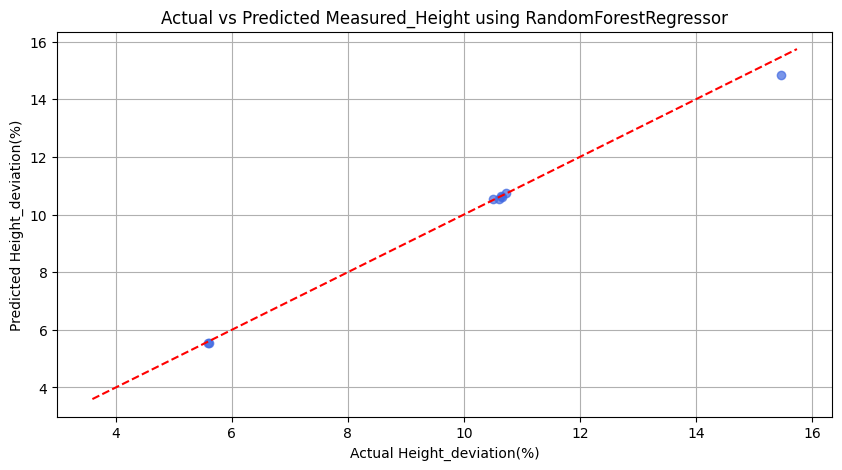

In [ ]:
# Now, you can define the model
# model = LinearRegression()
# model = DecisionTreeRegressor(random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = SVR(kernel='rbf')  # Using Radial Basis Function kernel
# model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
# model = GaussianNB()


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Actual_data: \n{y_test}')
print(f'Predicted_data: \n{y_pred}')

# Plotting actual vs predicted Height_deviation(%)s
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# plt.title('Actual vs Predicted Measured_Height using LinearRegression')
# plt.title('Actual vs Predicted Measured_Height using DecisionTreeRegressor')
plt.title('Actual vs Predicted Measured_Height using RandomForestRegressor')
# plt.title('Actual vs Predicted Measured_Height using SVM')


plt.xlabel('Actual Height_deviation(%)')
plt.ylabel('Predicted Height_deviation(%)')
plt.grid()
plt.show()

# **New Data**

RandomForestRegressor
Index | Predicted | Actual
------------------------------
0     | 10.54     | 10.57666667
1     | 10.75     | 10.74
2     | 10.77     | 10.76666667
3     | 10.77     | 10.78333333
4     | 10.6      | 10.65333333
5     | 10.7      | 10.70333333
6     | 10.76     | 10.76666667
7     | 10.7      | 10.69333333
8     | 10.6      | 10.64
9     | 10.7      | 10.7
10    | 10.76     | 10.76
11    | 10.7      | 10.69666667
12    | 10.52     | 10.6
13    | 10.46     | 10.41666667
14    | 10.74     | 10.74
15    | 10.74     | 10.73333333
16    | 10.53     | 10.50666667
17    | 10.56     | 10.55
18    | 10.63     | 10.61333333
19    | 10.64     | 10.64
20    | 5.4       | 5.47
21    | 5.56      | 5.61
22    | 5.58      | 5.62
23    | 5.61      | 5.6
24    | 5.39      | 5.53
25    | 5.51      | 5.57
26    | 5.55      | 5.583333333
27    | 5.56      | 5.6
28    | 7.46      | 7.64
29    | 7.49      | 7.596666667
30    | 7.73      | 7.773333333
31    | 7.76      | 7.783333333
32  

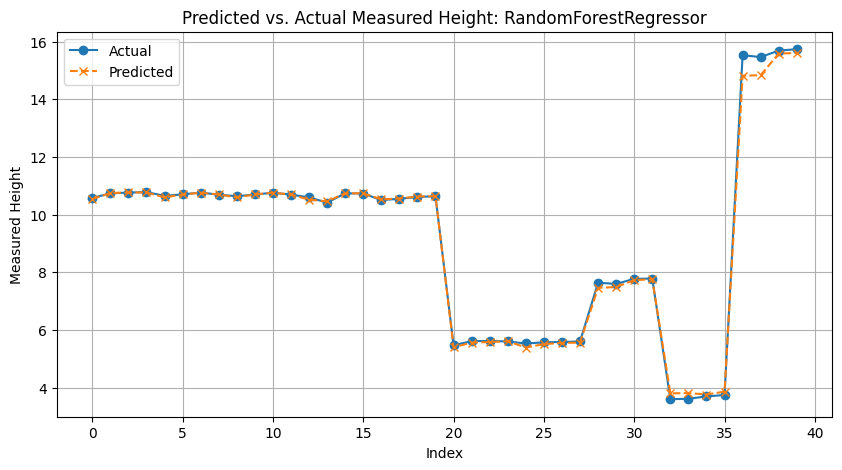

In [ ]:
# new_data = pd.DataFrame({
#     'Layer_thickness(mm)': [.35],
#     'Infill_density(%)':[80],
#     'Wall_thickness':[5],
#     'Measured_wall_thickness':[5.14],
#     'Height' : [10],
#     'Volume':[2356],
#     'Height_deviation(%)':[12.0]
# })

# predicted_height = model.predict(new_data)

# Print with 2 decimal places
# print(f'Predicted measured_Height:\n{np.round(predicted_height, 2)}')
# print(f'\nActual measured_Height:\n{np.round(y, 2)}')

new_data = df.drop(columns=['Measured_height'])
# y = df['Measured_height']

# new_data = pd.DataFrame(X_train)
predicted_height = model.predict(new_data)

# Ensure both arrays have the same shape
predicted_height = np.round(predicted_height.flatten(), 2)  # Flatten if needed

# Print column-wise with index
# print("DecessionTreeRegressor")
print("RandomForestRegressor")
# print("LinearRegressor")
# print("SVM")
print("Index | Predicted | Actual")
print("-" * 30)
for idx, (pred, actual) in enumerate(zip(predicted_height, y)):
    print(f"{idx:<5} | {pred:<9} | {actual}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y, label="Actual", marker="o", linestyle="-")
plt.plot(predicted_height, label="Predicted", marker="x", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Measured Height")
plt.title("Predicted vs. Actual Measured Height: RandomForestRegressor")
plt.legend()
plt.grid(True)
plt.show()